['aspiny' 'spiny']
    dendrite_type  dendrite_type_number
0           spiny                     1
1           spiny                     1
2           spiny                     1
3           spiny                     1
4           spiny                     1
..            ...                   ...
662        aspiny                     0
663        aspiny                     0
664         spiny                     1
665         spiny                     1
666        aspiny                     0

[618 rows x 2 columns]
['1' '2' '2/3' '3' '4' '5' '6' '6a' '6b']
    structure_layer_name  structure_layer_name_number
0                      5                            5
1                      5                            5
2                      4                            4
3                      4                            4
4                      3                            3
..                   ...                          ...
662                    5                            5
663

c:\Users\lynnh\OneDrive\research\cell_classification\scripts\get_features.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
c:\Users\lynnh\OneDrive\research\cell_classification\scripts\get_features.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
c:\Users\lynnh\OneDrive\

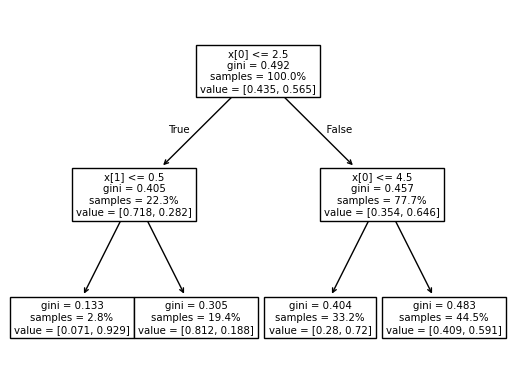

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from decisionTree import make_decisionTree,  get_acc
from get_features import get_labels, get_dataframes

filtered_dataframe_labels = get_labels()
X = filtered_dataframe_labels[["structure_layer_name_number", "peak_v_long_square"]]
Y = filtered_dataframe_labels['dendrite_type_number']
max_leaf_nodes = 4
make_decisionTree(X, Y, max_leaf_nodes)




[[ 75 143]
 [ 19 257]]


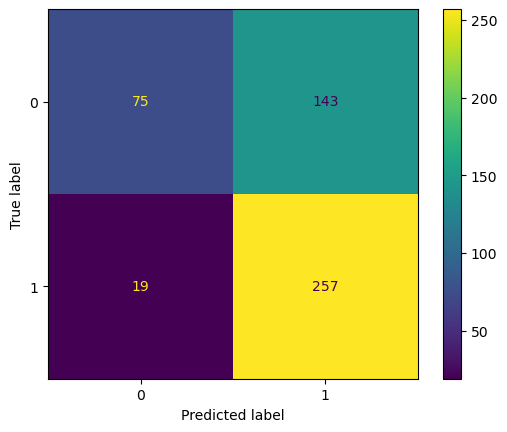

In [2]:
import numpy as np

X2 = X.to_numpy()
Y2 = Y.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X2, Y2, test_size=0.20, random_state=42, stratify=Y2)

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)

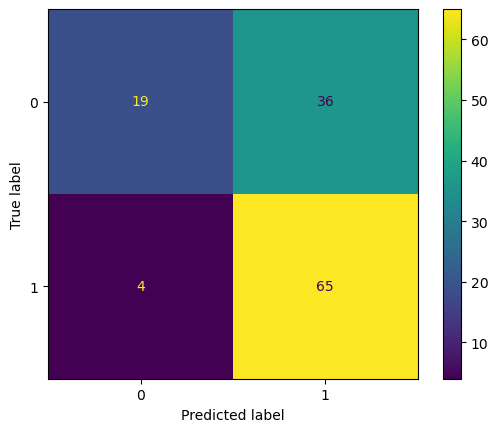

In [3]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

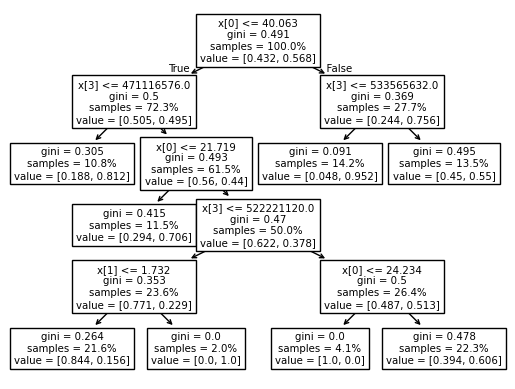

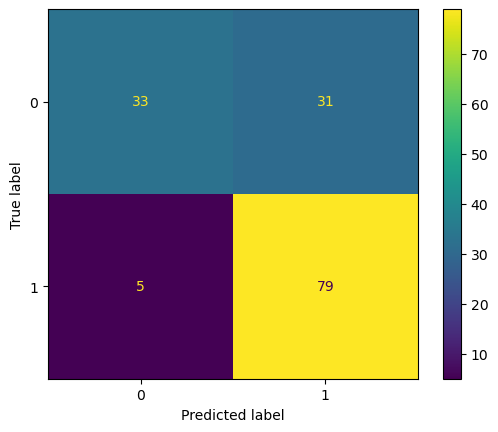

In [7]:
ef_df = get_dataframes()
full_dataframe = pd.merge(ef_df, filtered_dataframe_labels, left_index=True, right_index=True)

X = full_dataframe[["peak_v_long_square", "slow_trough_t_short_square", "fast_trough_v_ramp", "rheobase_sweep_id"]]
Y = full_dataframe['dendrite_type_number']

X2 = X.to_numpy()
Y2 = Y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X2, Y2, test_size=0.20, random_state=42)



clf = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
clf.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(clf, proportion=True)
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)


<function matplotlib.pyplot.show(close=None, block=None)>

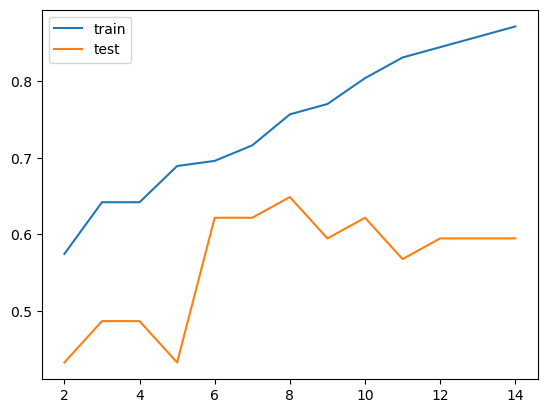

In [5]:
from decisionTree import get_acc
list_nodes = [2, 3, 4, 5, 6, 7, 8]
list_nodes = np.arange(2,15)

train_accs, test_accs = get_acc(X_train, y_train, X_test, y_test, list_nodes)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_nodes, train_accs, label="train")
ax.plot(list_nodes, test_accs, label = "test")
plt.legend()
plt.show


In [6]:
print(X_train)
print(X_train.shape)
print(X_train.T)
print(X_train.T.shape)

[[ 2.15625019e+01  1.49554500e+00 -4.60312513e+01  4.80115654e+08]
 [ 3.49062538e+01  1.07468000e+00 -4.65937513e+01  5.15524151e+08]
 [ 4.66875038e+01             nan -5.79895859e+01  5.08423449e+08]
 [ 2.95937500e+01             nan -4.71354179e+01  4.97612884e+08]
 [ 5.16250038e+01             nan -5.48645859e+01  5.96056228e+08]
 [ 3.66875000e+01  1.31854000e+00 -4.93020871e+01  5.09673325e+08]
 [ 4.71250000e+01             nan -4.84062500e+01  5.67743503e+08]
 [ 1.31875010e+01             nan -5.70156250e+01  3.96304418e+08]
 [ 3.65625024e+00  1.60831100e+00 -6.30937519e+01  4.67864396e+08]
 [ 3.76250038e+01             nan -4.77812525e+01  5.67764336e+08]
 [ 5.01250038e+01             nan -5.12395846e+01  5.26727625e+08]
 [ 9.37500000e+00             nan -5.20416705e+01  5.85949468e+08]
 [ 2.98437519e+01  1.63199250e+00 -4.36250025e+01  4.87601631e+08]
 [ 3.23125000e+01  1.58228400e+00 -4.63229192e+01  5.24690792e+08]
 [ 2.58125019e+01             nan -5.25312538e+01  5.70899606e